In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Name -- Data Type -- Measurement -- Description

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

8. Age -- quantitative -- Day (1~365) -- Input Variable

9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [93]:
data = pd.read_csv("/Users/abhraneelsaha/Desktop/Concrete_Data_Yeh.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


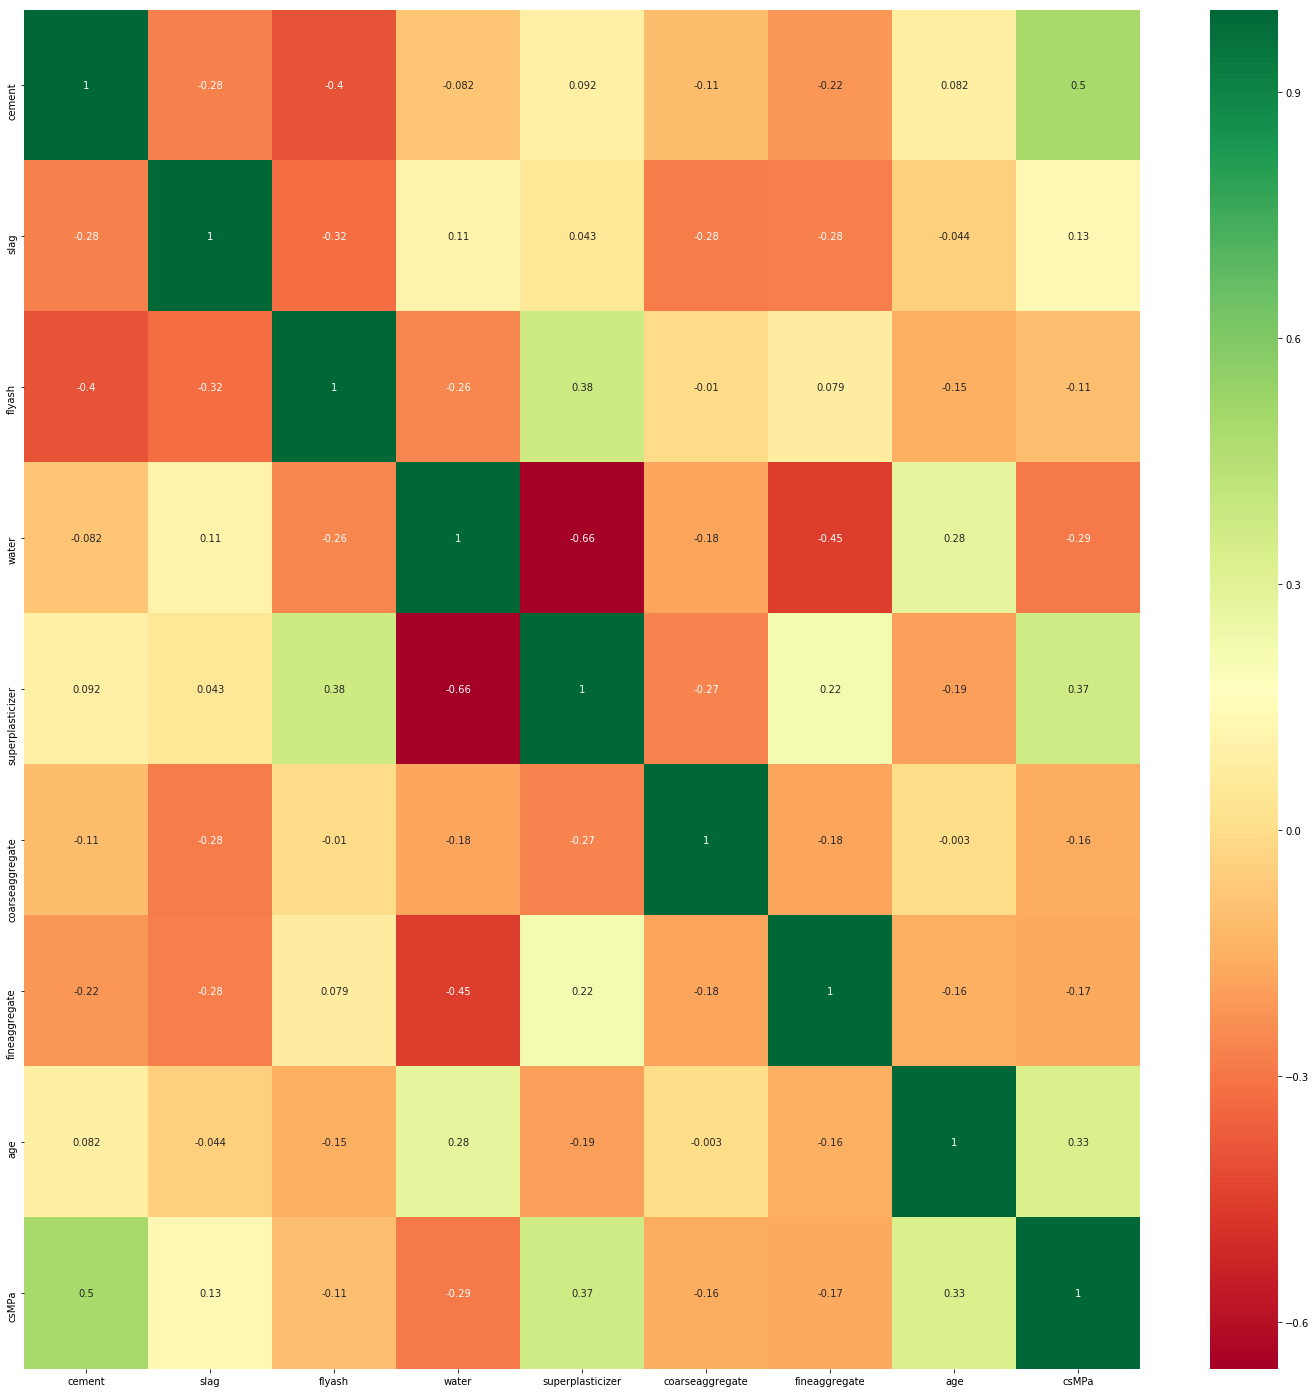

In [95]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# OBSERVATIONS:
    
We observe a good positive correlation between csMPa and :
    1. Cement
    2. Age
    3. Superplasticizer
    
We also observe a good negetive correlation between csMPa and:
    1. Water

Superplasticizer and water have a very strong negetive correlation

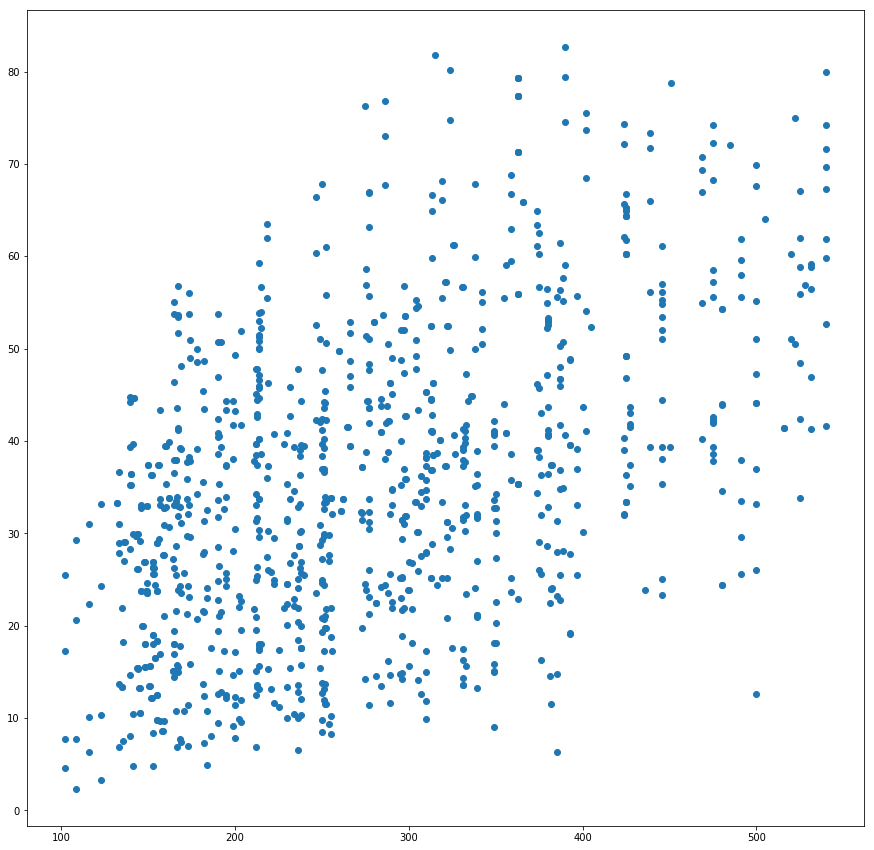

In [96]:
plt.figure(figsize = (15,15))
plt.scatter(x = 'cement',
           y = 'csMPa',
           data = data)
plt.show()

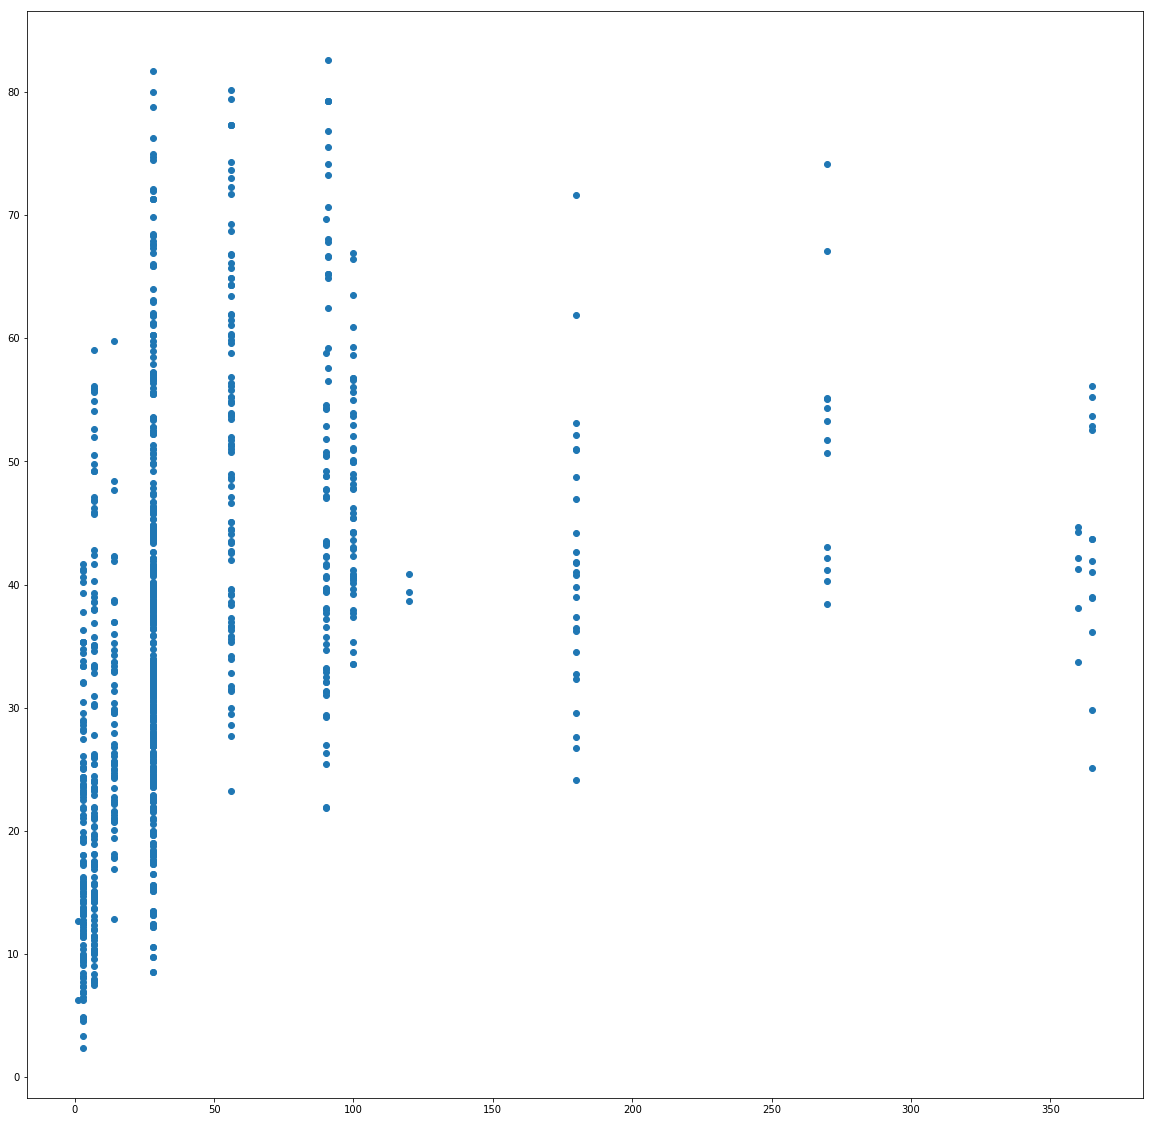

In [97]:
plt.figure(figsize = (20,20))
plt.scatter(x = 'age',
           y = 'csMPa',
           data = data)
plt.show()

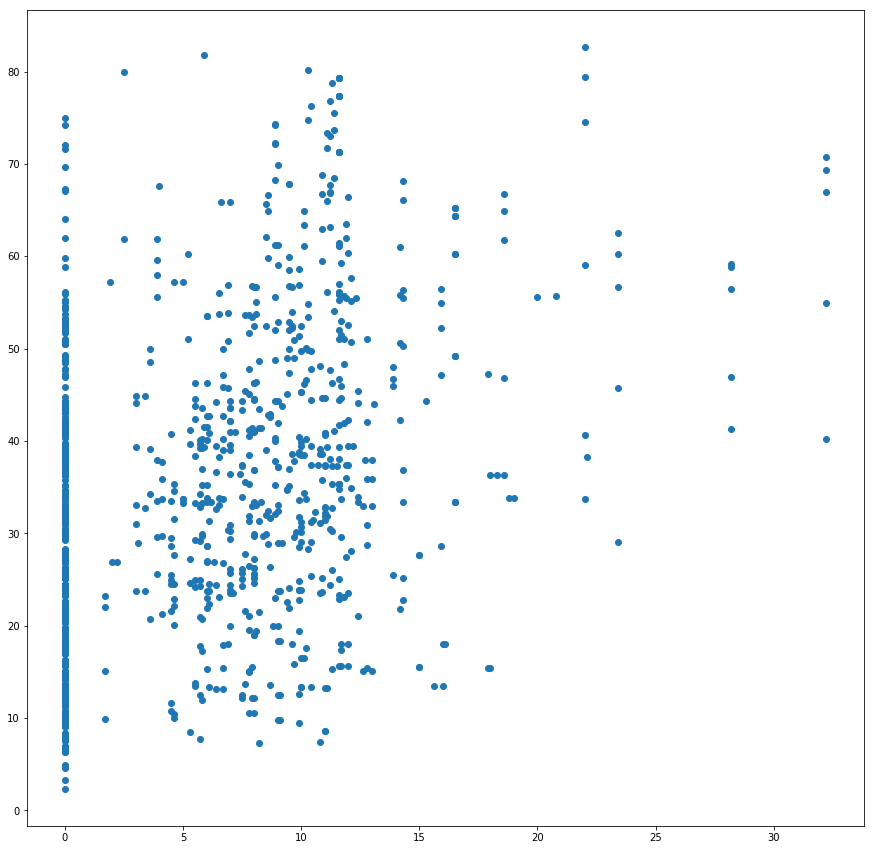

In [98]:
plt.figure(figsize = (15,15))
plt.scatter(x = 'superplasticizer',
           y = 'csMPa',
           data = data)
plt.show()

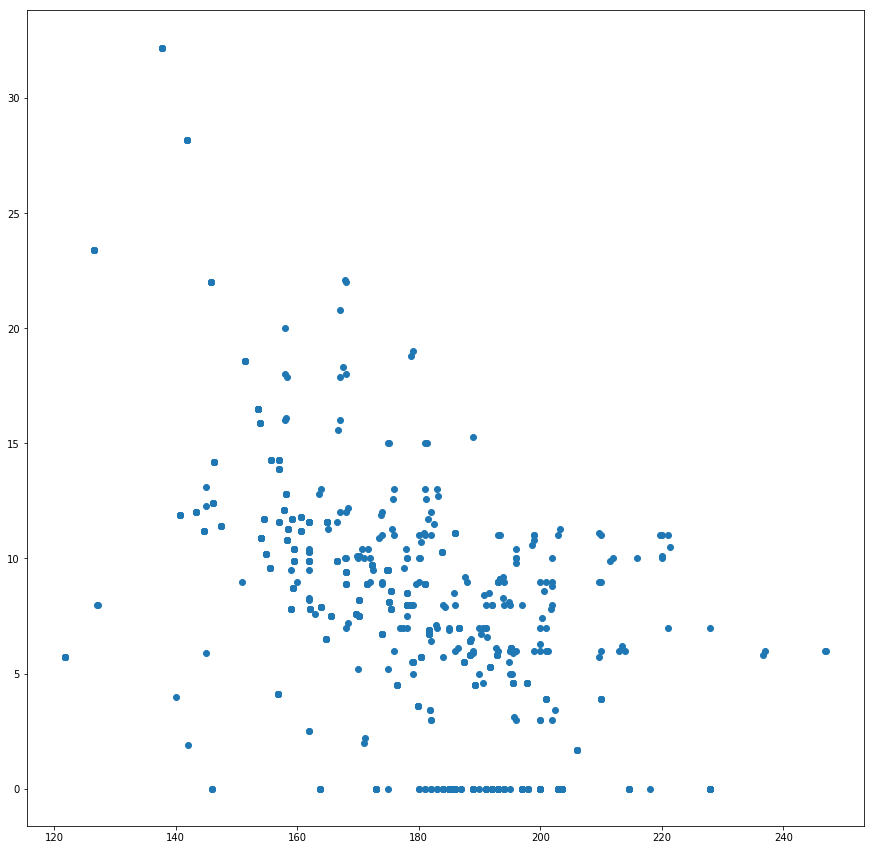

In [99]:
plt.figure(figsize = (15,15))
plt.scatter(x = 'water',
           y = 'superplasticizer',
           data = data)
plt.show()

The observations made have been shown above in the graphs above

In [100]:
fields = list(data.keys())
values = []
scaled_values = []
for field in fields:
    values = data[field]
    maximum = max(values)
    avg = sum(values)/len(values)
    for value in values:
        scaled_values += [(value-avg)/maximum]
    scaled_values = np.array(scaled_values)
    data["Scaled_" + field] = scaled_values
    
data.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age,Scaled_csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


In [101]:
for field in fields:
    data.drop([field], axis = 1, inplace = True)
    
data.head()

,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age,Scaled_csMPa
0,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


In [102]:
y = data["Scaled_csMPa"]
data.drop(["Scaled_csMPa"], axis = 1, inplace = True)
X = data

In [103]:
y.head()

0    0.479319
1    0.479319
2    0.095060
3    0.095060
4   -0.152903
Name: Scaled_csMPa, dtype: float64

In [104]:
X.head()

,Scaled_cement,Scaled_slag,Scaled_flyash,Scaled_water,Scaled_superplasticizer,Scaled_coarseaggregate,Scaled_fineaggregate,Scaled_age
0,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
1,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319,0.479319
2,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
3,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060,0.095060
4,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903,-0.152903


# Train Test Splitting 

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 20)

In [106]:
print(X_train.shape)
print(y_train.shape)

(721, 8)
(721,)


# Linear Regression Model

In [107]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
y_predict = model.predict(X_test)

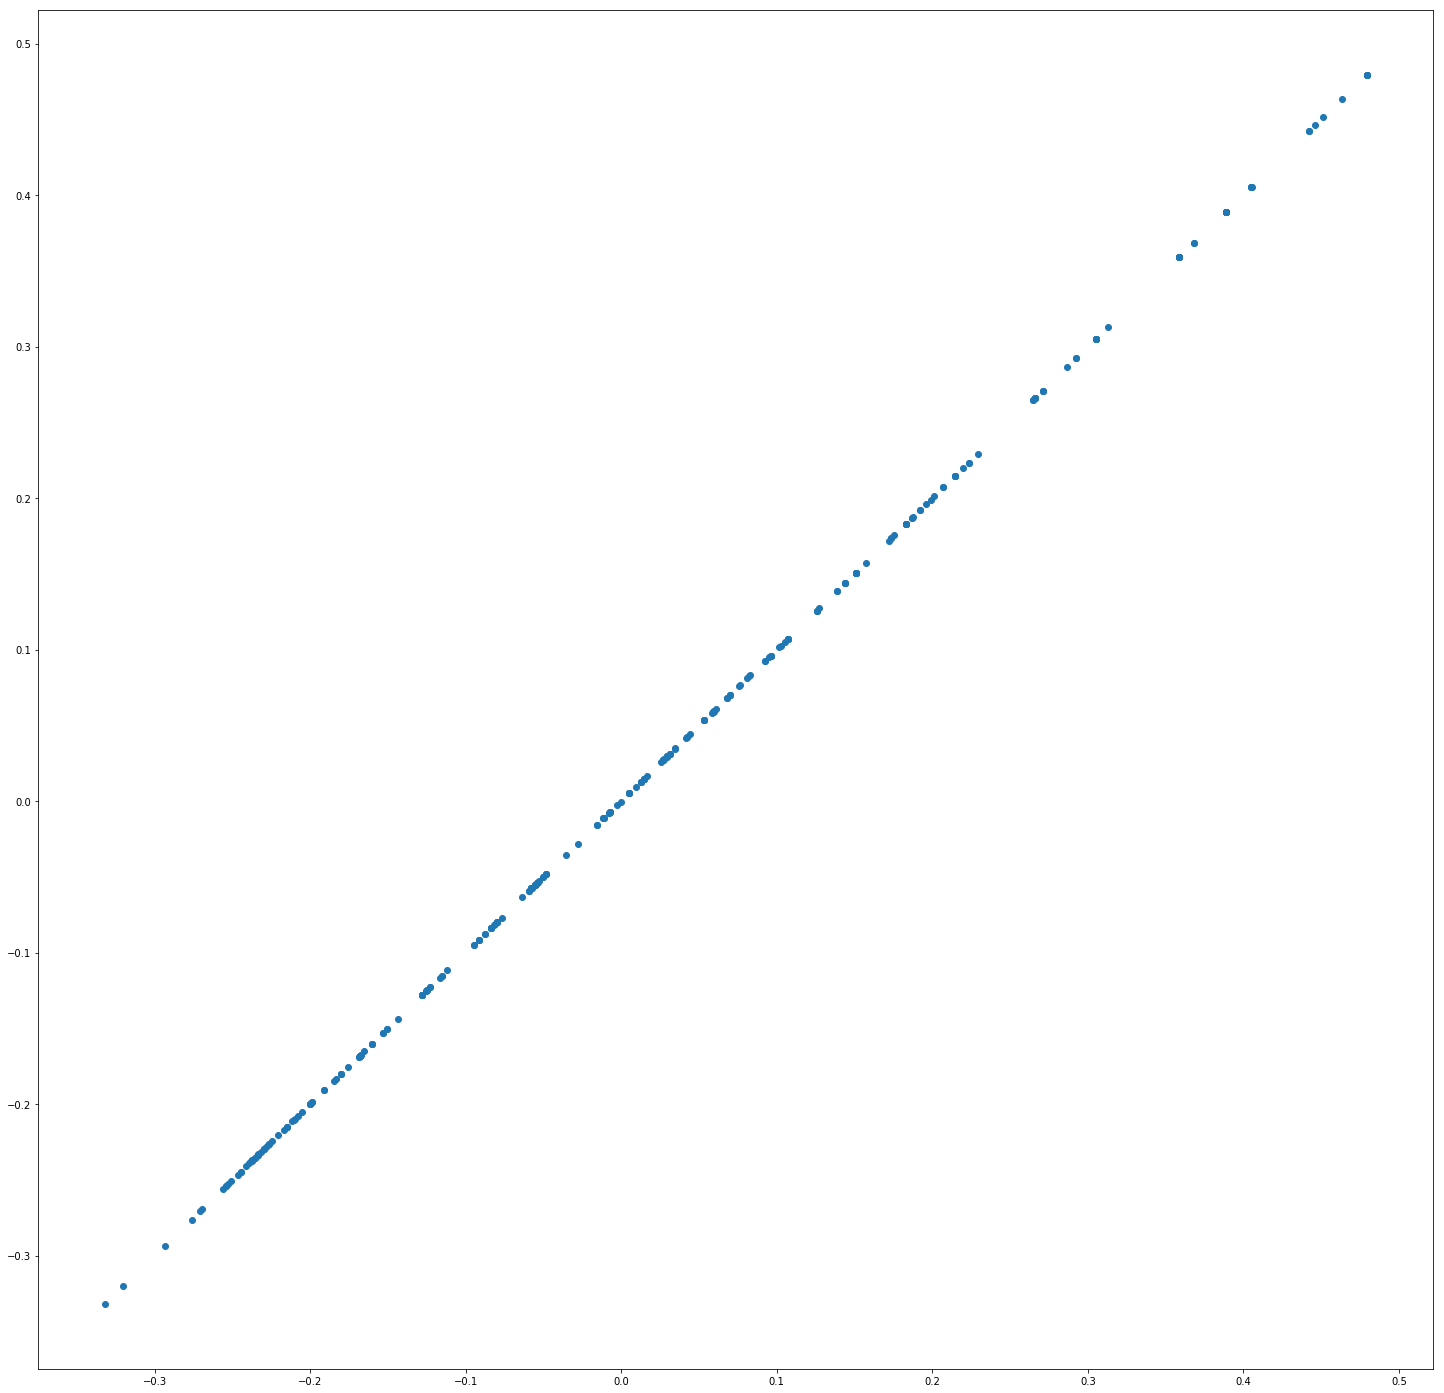

In [109]:
plt.figure(figsize = (25,25))
Y_test = [i for i in y_test]
Y_predict = [j for j in y_predict]
plt.scatter(Y_test,Y_predict)
plt.show()

# TEST DATA

In [110]:
data_test = pd.read_csv("/Users/abhraneelsaha/Desktop/concrete.csv")

In [111]:
data_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [112]:
fields = list(data_test.keys())
values = []
scaled_values = []
for field in fields:
    values = data_test[field]
    maximum = max(values)
    avg = sum(values)/len(values)
    for value in values:
        scaled_values += [(value-avg)/maximum]
    scaled_values = np.array(scaled_values)
    data_test["Scaled_" + field] = scaled_values
    
data_test.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age,Scaled_strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015


In [113]:
for field in fields:
    data_test.drop([field], axis = 1, inplace = True)
    
data_test.head()

,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age,Scaled_strength
0,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015,-0.259015
1,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903,-0.207903
2,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718,-0.057718
3,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089,-0.028089
4,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015,-0.234015


In [114]:
Y = data_test["Scaled_strength"]
data_test.drop(["Scaled_strength"], axis = 1, inplace = True)

In [115]:
y_predict = model.predict(data_test)

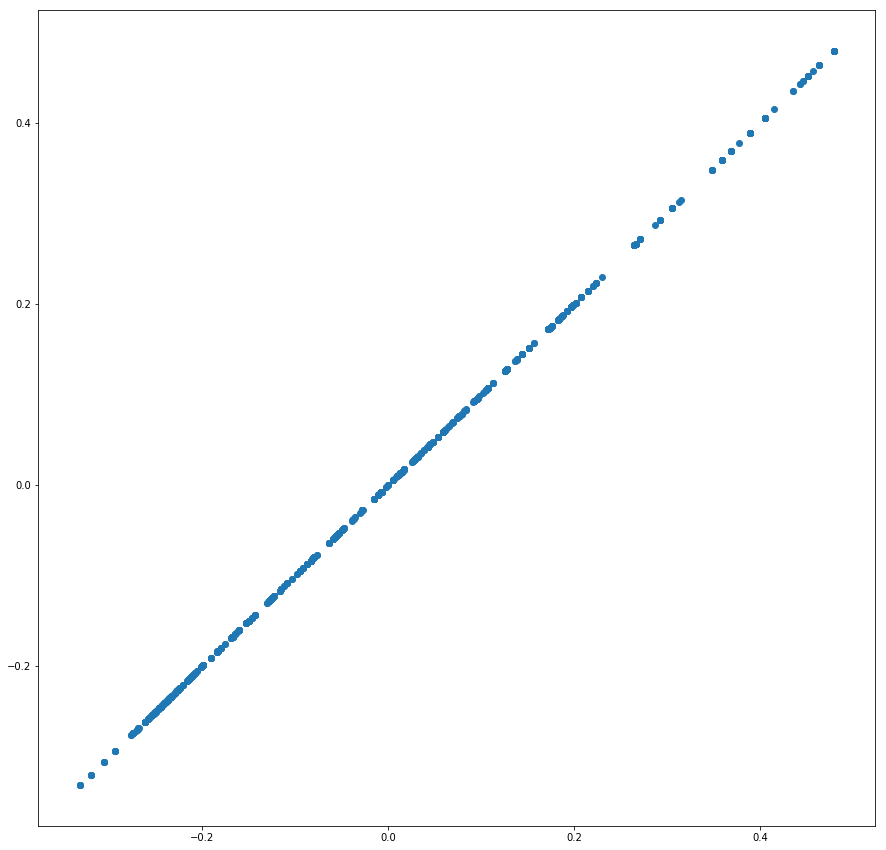

In [116]:
plt.figure(figsize=(15,15))
plt.scatter(Y, y_predict)
plt.show()

# Saving model in disk

In [117]:
import pickle
filename = "Concrete_strength_Lr_Model"
pickle.dump(model, open(filename,"wb"))